# # BƯỚC 1: TIỀN XỬ LÝ DỮ LIỆU VÀ EDA
# 
# **Mục tiêu:** 
# - Tải và làm sạch dữ liệu
# - Thực hiện Exploratory Data Analysis (EDA)
# - Hiểu cấu trúc và phân bố của dữ liệu

In [2]:
import sys
sys.path.append('../src')

from apriori_library import DataCleaner
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Khởi tạo DataCleaner
cleaner = DataCleaner('../data/raw/online_retail.csv')

# Tải dữ liệu
df_raw = cleaner.load_data()
print("Thông tin dữ liệu gốc:")
print(df_raw.info())
print("\n5 dòng đầu tiên:")
print(df_raw.head())


Dữ liệu gốc: 541909 hàng, 8 cột
Thông tin dữ liệu gốc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

5 dòng đầu tiên:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED 

In [4]:
# Hiển thị thống kê mô tả
print("Thống kê mô tả Quantity:")
print(df_raw['Quantity'].describe())

print("\nThống kê mô tả UnitPrice:")
print(df_raw['UnitPrice'].describe())

Thống kê mô tả Quantity:
count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Thống kê mô tả UnitPrice:
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


In [5]:
# Làm sạch dữ liệu
df_clean = cleaner.clean_data()

Dữ liệu đã làm sạch: 354321 hàng, 9 cột


In [6]:
# Tạo các đặc trưng thời gian
df_clean = cleaner.create_time_features()

# Hiển thị thông tin sau khi làm sạch
print("\nThông tin dữ liệu đã làm sạch:")
print(df_clean.info())
print(f"\nSố lượng giao dịch duy nhất: {df_clean['InvoiceNo'].nunique()}")
print(f"Số lượng sản phẩm duy nhất: {df_clean['Description'].nunique()}")
print(f"Số lượng khách hàng duy nhất: {df_clean['CustomerID'].nunique()}")


Thông tin dữ liệu đã làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int32         
 7   Country      354321 non-null  object        
 8   TotalPrice   354321 non-null  float64       
 9   Year         354321 non-null  int32         
 10  Month        354321 non-null  int32         
 11  Day          354321 non-null  int32         
 12  Hour         354321 non-null  int32         
 13  Weekday      354321 non-null  int32         
 14  DayName      354321 non-null  object        
dtypes: date

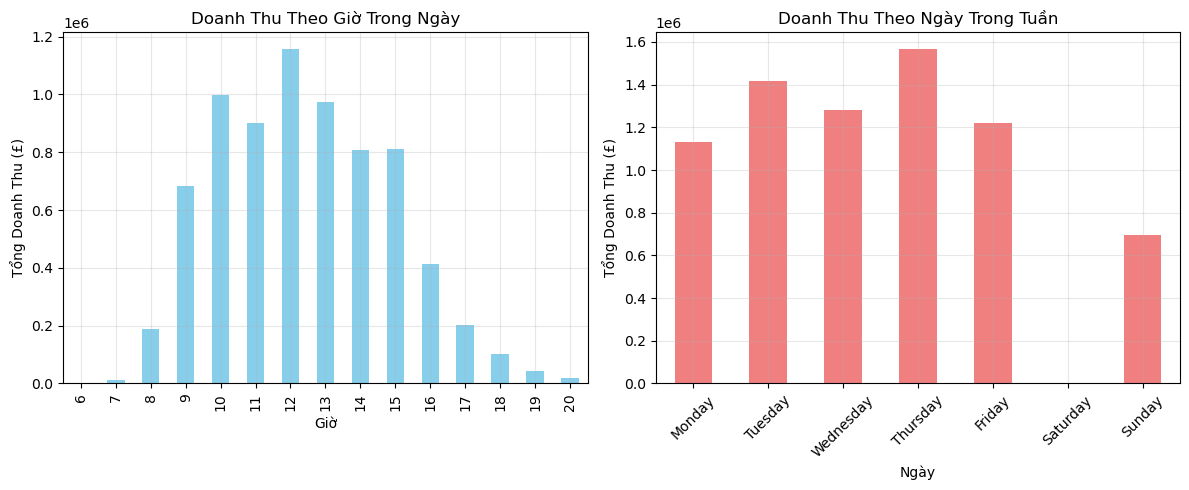

In [7]:
# PHÂN TÍCH EDA

# 1. Phân bố doanh thu theo giờ trong ngày
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
hourly_sales = df_clean.groupby('Hour')['TotalPrice'].sum()
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Doanh Thu Theo Giờ Trong Ngày')
plt.xlabel('Giờ')
plt.ylabel('Tổng Doanh Thu (£)')
plt.grid(True, alpha=0.3)

# 2. Phân bố doanh thu theo ngày trong tuần
plt.subplot(1, 2, 2)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df_clean.groupby('DayName')['TotalPrice'].sum().reindex(weekday_order)
daily_sales.plot(kind='bar', color='lightcoral')
plt.title('Doanh Thu Theo Ngày Trong Tuần')
plt.xlabel('Ngày')
plt.ylabel('Tổng Doanh Thu (£)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

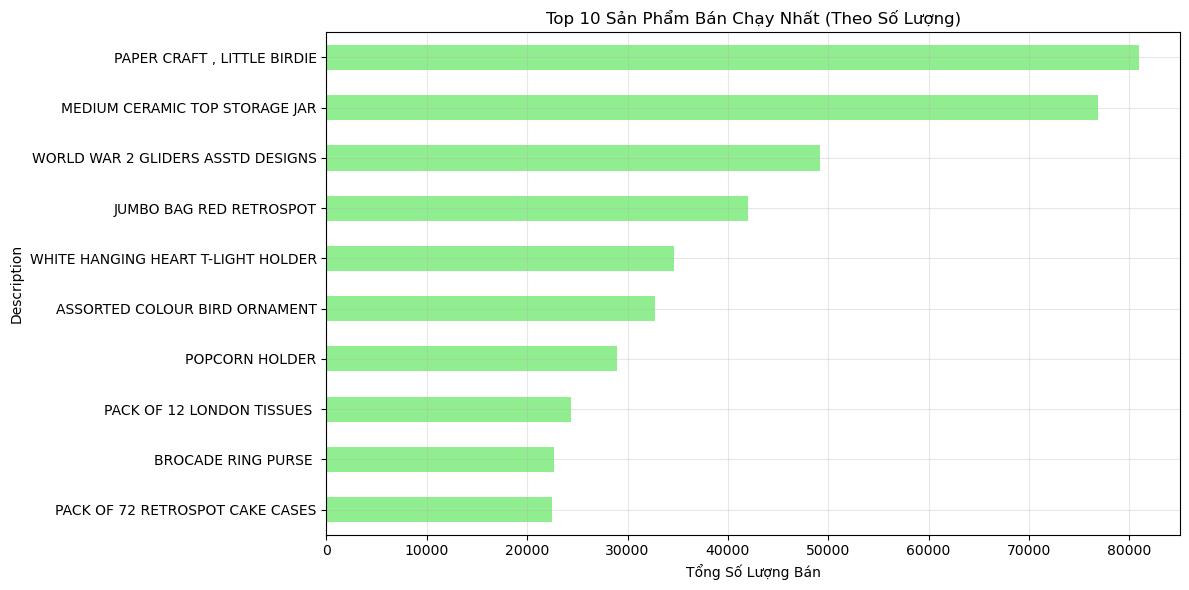

In [8]:
# 3. Top 10 sản phẩm bán chạy nhất
plt.figure(figsize=(12, 6))

top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Sản Phẩm Bán Chạy Nhất (Theo Số Lượng)')
plt.xlabel('Tổng Số Lượng Bán')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

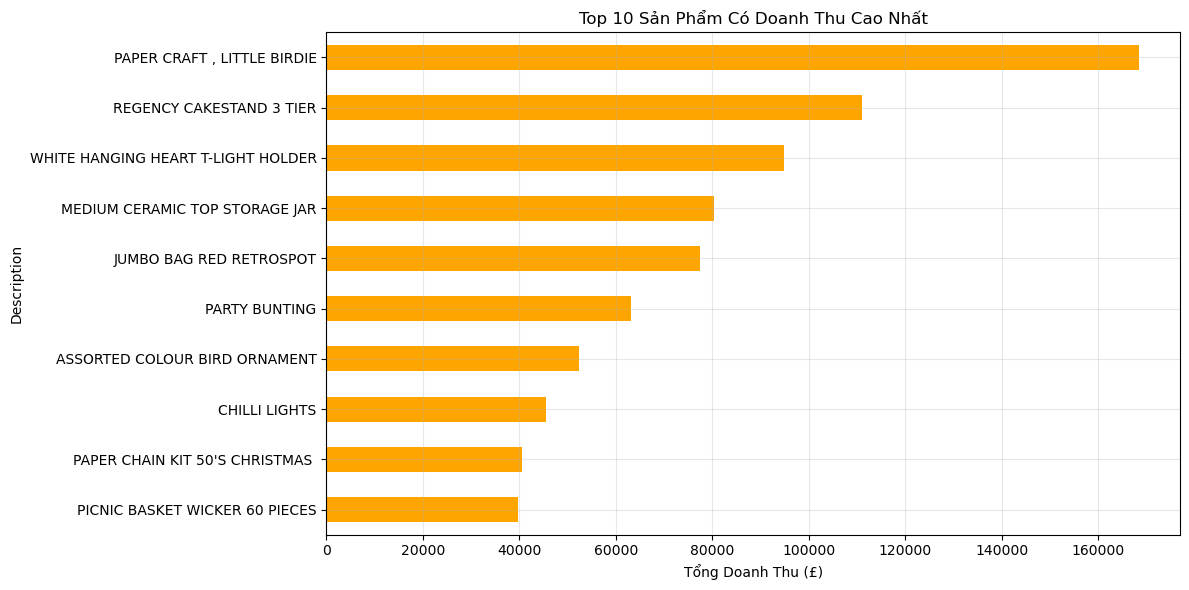

In [9]:
# 4. Top 10 sản phẩm có doanh thu cao nhất
plt.figure(figsize=(12, 6))

top_revenue = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_revenue.plot(kind='barh', color='orange')
plt.title('Top 10 Sản Phẩm Có Doanh Thu Cao Nhất')
plt.xlabel('Tổng Doanh Thu (£)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

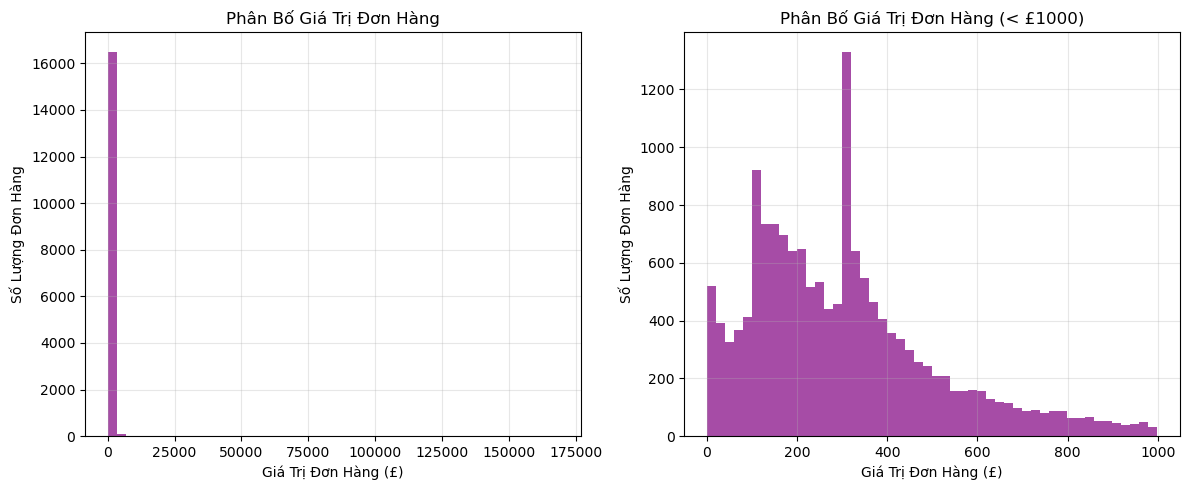

In [10]:
# 5. Phân bố giá trị đơn hàng
plt.figure(figsize=(12, 5))

invoice_totals = df_clean.groupby('InvoiceNo')['TotalPrice'].sum()

plt.subplot(1, 2, 1)
invoice_totals.hist(bins=50, color='purple', alpha=0.7)
plt.title('Phân Bố Giá Trị Đơn Hàng')
plt.xlabel('Giá Trị Đơn Hàng (£)')
plt.ylabel('Số Lượng Đơn Hàng')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Phóng to vùng giá trị thấp (< 1000)
invoice_totals[invoice_totals < 1000].hist(bins=50, color='purple', alpha=0.7)
plt.title('Phân Bố Giá Trị Đơn Hàng (< £1000)')
plt.xlabel('Giá Trị Đơn Hàng (£)')
plt.ylabel('Số Lượng Đơn Hàng')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Lưu dữ liệu đã làm sạch
df_clean.to_parquet('../data/processed/basket_bool.parquet', index=False)
print("Đã lưu dữ liệu đã làm sạch vào: /data/processed/basket_bool.parquet")

Đã lưu dữ liệu đã làm sạch vào: /data/processed/basket_bool.parquet
